In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
test=pd.read_csv("test.csv")

In [5]:
clf

DecisionTreeClassifier(criterion='entropy')

In [6]:
X=data[["X_1","X_2"]]
y=data.Y

In [7]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

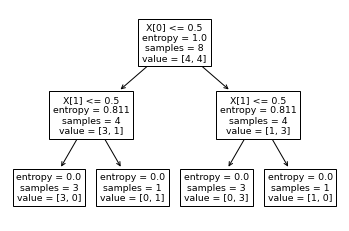

In [8]:
tree.plot_tree(clf.fit(X,y))

In [9]:
an=pd.read_csv("https://stepik.org/media/attachments/course/4852/cats.csv",index_col=0)

In [10]:
def entropy(p):
    if p==0 or p==1:
        return 0
    else: return -p*np.log2(p)-(1-p)*np.log2(1-p)

In [11]:
entropy(4/10)-(0.5*entropy(1/5))

0.6099865470109874

In [12]:
entropy(4/10)

0.9709505944546686

In [13]:
1-0.36

0.64

In [14]:
entropy(4/9)

0.9910760598382222

In [15]:
an

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [16]:
an["s"]=an["Вид"]=="собачка"

In [17]:
round(entropy(4/10),2)

0.97

In [18]:
entropy(6/10)

0.9709505944546686

In [19]:
0.97 - (1/10*0 + 9/10*0.99)

0.07899999999999996

In [20]:
titanic_data=pd.read_csv("train.csv")

In [21]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
X=titanic_data.drop(["PassengerId",'Survived',"Name",'Ticket','Cabin'],axis=1)

In [23]:
y=titanic_data.Survived

In [24]:
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [25]:
X=pd.get_dummies(X)

In [26]:
X=X.fillna({"Age": X.Age.median()})

In [27]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [30]:
clf.score(X_train,y_train)

0.8473154362416108

In [31]:
clf.score(X_test,y_test)

0.8271186440677966

In [32]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
clf.score(X_test,y_test)

0.7762711864406779

In [34]:
scores_data=pd.DataFrame()
from sklearn.model_selection import cross_val_score

In [35]:
max_depth_val=range(1,50)
for max_depth in max_depth_val:
    clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score=clf.score(X_train,y_train)
    test_score=clf.score(X_test,y_test)
    mean_cross_val_score=cross_val_score(clf,X_train,y_train,cv=5).mean()
    temp_scores_data=pd.DataFrame({'max_depth':[max_depth],
                                   'train_score':[train_score],
                                   'trst_score':[test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    scores_data=scores_data.append(temp_scores_data)

In [36]:
scores_data["cross_val_score"]

0    0.788501
0    0.781821
0    0.832185
0    0.825574
0    0.818754
0    0.812129
0    0.818866
0    0.805434
0    0.790364
0    0.781989
0    0.785336
0    0.787017
0    0.790364
0    0.788669
0    0.787003
0    0.786975
0    0.792017
0    0.783627
0    0.783627
0    0.768501
0    0.771877
0    0.770196
0    0.766835
0    0.773543
0    0.773529
0    0.771863
0    0.773543
0    0.766835
0    0.765154
0    0.768501
0    0.765154
0    0.768473
0    0.773543
0    0.763459
0    0.770182
0    0.768501
0    0.770168
0    0.773557
0    0.778585
0    0.768501
0    0.768487
0    0.766807
0    0.763473
0    0.765140
0    0.771863
0    0.771849
0    0.755070
0    0.773529
0    0.765140
Name: cross_val_score, dtype: float64

In [37]:
scores_data_long=pd.melt(scores_data,id_vars=['max_depth'],value_vars=['train_score','trst_score','cross_val_score'],var_name='set_type',value_name='score')

In [38]:
scores_data_long[]

SyntaxError: invalid syntax (Temp/ipykernel_5388/314427400.py, line 1)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

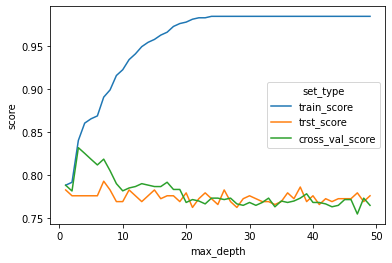

In [39]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long)

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=13)

In [42]:
cross_val_score(clf,X_test,y_test,cv=5).mean()

0.7932203389830509

In [43]:
iris=pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv",index_col=[0,1])

In [44]:
iris=iris.reset_index()
iris=iris.drop('level_0',axis=1)

In [45]:
X_train=iris[["sepal length",'sepal width','petal length','petal width']]

In [46]:
y_train=iris['species']

In [47]:
iris_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',index_col=[0,1])

In [48]:
iris_test=iris_test.reset_index()
iris_test=iris_test.drop('level_0',axis=1)

In [49]:
X_test=iris_test.drop("species",axis=1)

In [50]:
y_test=iris_test["species"]

In [51]:
a=range(1,100)
scores=pd.DataFrame()

In [52]:
for m in range(1,100):
    clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=m)
    clf.fit(X_train,y_train)
    train_score=clf.score(X_train,y_train)
    test_score=clf.score(X_test,y_test)
    temp_scores_data=pd.DataFrame({'max_depth':[m],
                                   'train_score':[train_score],
                                   'trst_score':[test_score]})
    scores=scores.append(temp_scores_data)

In [53]:
scores_data_long=pd.melt(scores,id_vars=['max_depth'],value_vars=['train_score','trst_score'],var_name='set_type',value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

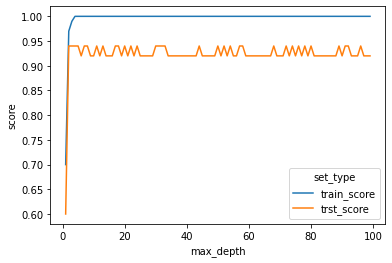

In [54]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long)

In [55]:
animals=pd.read_csv("dogs_n_cats.csv",encoding = "UTF-8")

In [56]:
animals

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [57]:
X_train=animals.drop("Вид",axis=1)

In [58]:
y_train=animals['Вид']=='собачка'

In [59]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [60]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
test=pd.read_json("dataset_209691_15.txt")

In [62]:
test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,17,20.4,1,1,0
1,23,27.6,1,1,0
2,27,32.4,1,1,0
3,23,27.6,1,1,0
4,33,39.6,1,1,0
...,...,...,...,...,...
95,6,2.4,1,0,1
96,7,2.8,1,0,1
97,6,2.4,1,1,1
98,12,4.8,0,0,1


In [63]:
len(clf.predict(test))

100

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [65]:
songs=pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [66]:
songs.artist.unique()

array(['gangstarr', 'blind-guardian', 'abba'], dtype=object)

In [6]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [68]:
clf=tree.DecisionTreeClassifier()

In [69]:
parametrs={'criterion':['gini','entropy'],'max_depth':range(1,30)}

In [70]:
gridsearch_clf=GridSearchCV(clf,parametrs)

In [71]:
gridsearch_clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [72]:
best=gridsearch_clf.best_estimator_

In [73]:
best.score(X_test,y_test)

ValueError: X has 4 features, but DecisionTreeClassifier is expecting 5 features as input.

In [74]:
from sklearn.metrics import precision_score, recall_score

In [75]:
pred=best.predict(X_test)

ValueError: X has 4 features, but DecisionTreeClassifier is expecting 5 features as input.

In [ ]:
precision_score(y_test,pred)

In [ ]:
recall_score(y_test,pred)

In [ ]:
predict_prob=best.predict_proba(X_test)

In [ ]:
predict_prob

In [ ]:
pd.Series(predict_prob[:,1]).hist()

In [ ]:
y_pred=np.where(predict_prob[:,1]>0.2,1,0)

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
recall_score(y_test,y_pred)
lw=2

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [119]:
clf =tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=100,min_samples_leaf=10)

In [134]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=16,
                       min_samples_split=41)

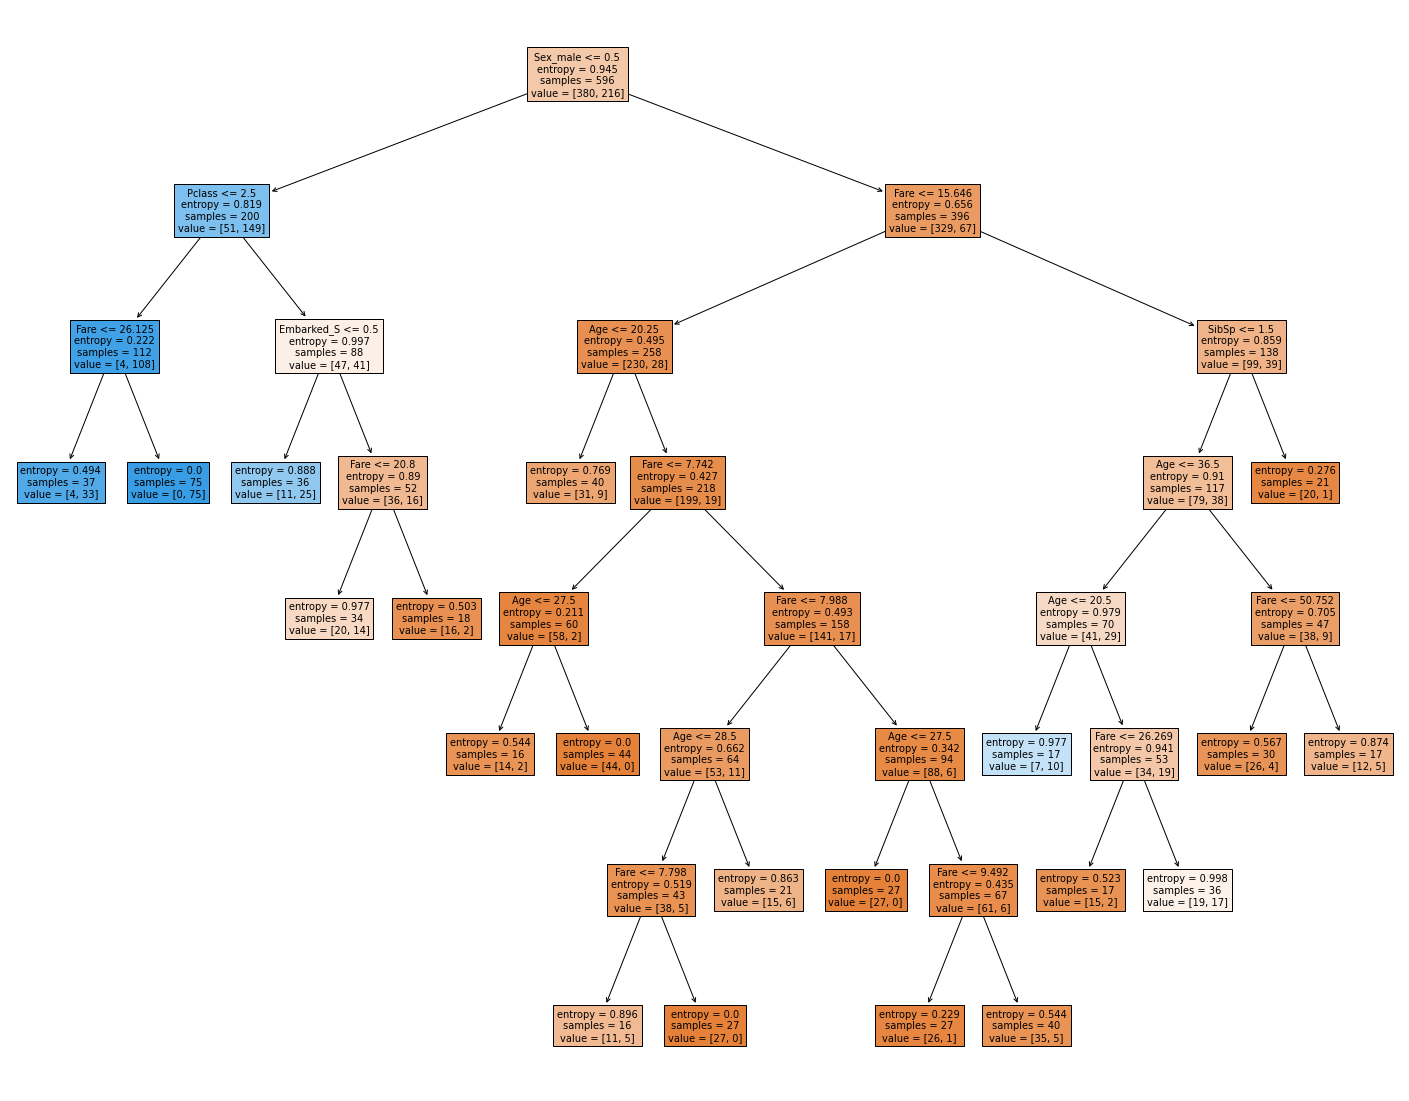

In [135]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=list(X),
                   filled=True)

In [122]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
684,2,60.0,1,1,39.0000,0,1,0,0,1
382,3,32.0,0,0,7.9250,0,1,0,0,1
131,3,20.0,0,0,7.0500,0,1,0,0,1
689,1,15.0,0,1,211.3375,1,0,0,0,1
151,1,22.0,1,0,66.6000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
320,3,22.0,0,0,7.2500,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
49,3,18.0,1,0,17.8000,1,0,0,0,1
521,3,22.0,0,0,7.8958,0,1,0,0,1


In [123]:
parametrs={'criterion':['entropy','gini'],'max_depth':range(1,30),'min_samples_split':range(1,100,10),'min_samples_leaf':range(1,50,5)}

In [139]:
clf=tree.DecisionTreeClassifier()

In [140]:
search=RandomizedSearchCV(clf,parametrs)

In [141]:
search.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 50, 5),
                                        'min_samples_split': range(1, 100, 10)})

In [142]:
search.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=21, min_samples_split=41)

In [2]:

from sklearn.ensemble import RandomForestClassifier

In [144]:
clf=RandomForestClassifier()

In [145]:
parametrs={'n_estimators':[10,20,30],'max_depth':[2,5,7,10]}

In [146]:
search=GridSearchCV(clf,parametrs,cv=5)


In [147]:
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [153]:
b=search.best_estimator_

In [154]:
b.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [162]:
b.score(X_test,y_test)

0.8271186440677966

In [164]:
imp=b.feature_importances_

In [173]:
importance=pd.DataFrame({'features':list(X),'importance':imp})

In [180]:
importance.sort_values('importance',ascending=0)

,features,importance
5,Sex_female,0.338455
6,Sex_male,0.193646
4,Fare,0.147907
0,Pclass,0.126534
1,Age,0.088538
2,SibSp,0.046266
3,Parch,0.021727
9,Embarked_S,0.017877
7,Embarked_C,0.010390
8,Embarked_Q,0.008660


array([[<AxesSubplot:title={'center':'importance'}>]], dtype=object)

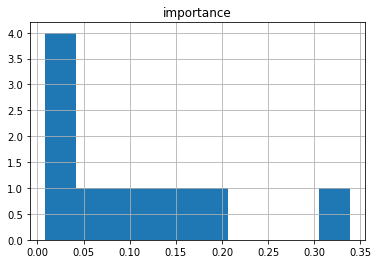

In [183]:
importance.hist()

In [185]:
heart=pd.read_csv('heart.csv')

In [194]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
x_train = heart.drop('target',axis=1)
y_train = heart['target']
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

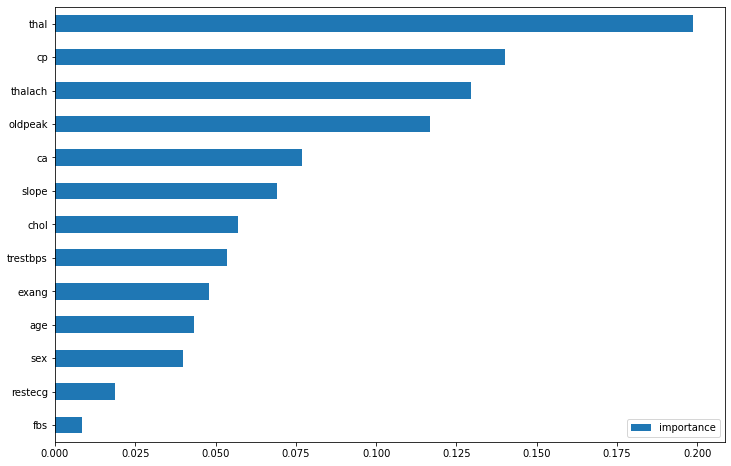

In [195]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [30]:
mashroom_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [32]:
mashroom_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [3]:
ft=RandomForestClassifier(random_state=0)

In [4]:
parametrs={'criterion':['entropy'],'n_estimators':range(10,50,10),'max_depth':range(1,12,2),'min_samples_leaf':range(1,7),'min_samples_split':(2,9,2)}

In [9]:
search=GridSearchCV(ft,parametrs,cv=3,n_jobs=-1)

In [58]:
search.fit(mashroom_data.drop('class',axis=1),mashroom_data['class'])

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': (2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [60]:
search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=10,
                       random_state=0)

In [67]:
best=search.best_estimator_

In [68]:
imp=best.feature_importances_

In [71]:
pd.DataFrame({'features':list(X),'importance':imp}).sort_values('importance',ascending=0)

,features,importance
4,odor,0.226638
18,ring-type,0.089779
7,gill-size,0.083579
10,stalk-root,0.077297
8,gill-color,0.076431
3,bruises,0.063426
6,gill-spacing,0.060140
20,population,0.050244
21,habitat,0.046704
12,stalk-surface-below-ring,0.038955


In [87]:
y_pred=best.predict(X_test)

In [88]:
Y=pd.read_csv('testing_y_mush.csv')
from sklearn.metrics import confusion_matrix

In [89]:
cf_matrix = confusion_matrix(Y, y_pred)

<AxesSubplot:>

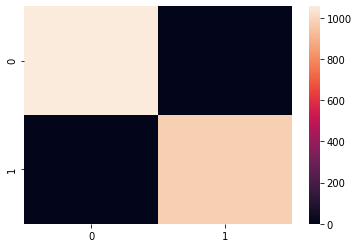

In [90]:
sns.heatmap(cf_matrix)

In [104]:
war_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [99]:
war_data['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [105]:
war_data

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [107]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(war_data['class'])
war_data['class']=le.transform(war_data['class'])

In [108]:
war_data

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,2,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,1,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,1,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,1,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,2,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,1,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,1,8.278256,8.353756,268.121561,0.132661,361911,13.905809


транспорт - 2 файтер - 1 круизер - 3

In [109]:
X_train=war_data.drop('class',axis=1)
y_train=war_data['class']

In [110]:
rf=RandomForestClassifier()

In [111]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
X_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [116]:
pred=pd.Series(rf.predict(X_test))

In [117]:
pred.value_counts()

1    675
2    595
0    230
dtype: int64

In [121]:
pd.DataFrame(rf.feature_importances_,list(X_test))

,0
g_reflection,0.222426
i_reflection,0.089969
speed,0.102389
brightness,0.270048
time_of_observance,0.000526
volume,0.314642


In [122]:
regions=pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [123]:
regions

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [124]:
rf=RandomForestClassifier()

In [125]:
rf.fit(regions.drop('dangerous',axis=1),regions.dangerous)

RandomForestClassifier()

In [131]:
pd.DataFrame(rf.feature_importances_,list(regions.drop('dangerous',axis=1)))

,0
r,0.183895
phi,0.178083
peradventure_index,0.184150
dustiness,0.239636
black_hole_is_near,0.003750
buggers_were_noticed,0.120654
nearby_system_has_planemo,0.089832


In [130]:
list(regions)

['r',
 'phi',
 'peradventure_index',
 'dustiness',
 'black_hole_is_near',
 'buggers_were_noticed',
 'nearby_system_has_planemo',
 'dangerous']

In [11]:
search=GridSearchCV(ft,parametrs,cv=3,n_jobs=-1)

In [12]:
parametrs

{'criterion': ['entropy'],
 'n_estimators': range(10, 50, 10),
 'max_depth': range(1, 12, 2),
 'min_samples_leaf': range(1, 7),
 'min_samples_split': (2, 9, 2)}